<a href="https://colab.research.google.com/github/saad3223/ML-Projects/blob/main/HW_Week10_Saad_Bousbait.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Run a PCA Algorithm to get 2 Principle Components for the 9 X features

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

In [10]:
print(principal_components)

[[-2.91302459e+00  9.56205755e-02]
 [ 4.29911330e-01 -5.88155666e-01]
 [-2.85225077e-01 -4.55174413e-01]
 [-2.93242265e+00  1.69555507e+00]
 [ 1.03357587e+00  1.36658709e-01]
 [ 2.24072616e-02 -1.77918658e+00]
 [-1.01583737e-01 -5.68251724e-01]
 [ 2.34216461e+00 -1.98845915e+00]
 [ 2.97376366e+00 -7.34688659e-01]
 [-1.81486997e-01 -4.02865873e-01]
 [ 1.26874386e+00 -6.56588363e-01]
 [ 1.67099640e+00  5.61162493e-01]
 [-1.12385093e+00 -9.61397405e-01]
 [ 1.08137420e+00 -4.81969530e-01]
 [ 5.80025152e-01  5.35326834e-01]
 [ 3.14378596e+00  6.63547921e-01]
 [ 2.11255447e-01  6.99242662e-01]
 [-2.67231388e+00  4.18172125e-01]
 [-1.56570962e-01  7.77395617e-01]
 [-7.93851561e-01 -1.20261085e-01]
 [ 9.95867143e-01 -9.71888439e-01]
 [-8.82087639e-01  4.57368180e-01]
 [ 1.40781361e-01 -2.15107731e+00]
 [ 2.46008609e+00  1.64540436e-02]
 [ 9.06594515e-01  3.02776054e-02]
 [-3.12205344e+00  3.87749688e-02]
 [-2.89897068e+00 -4.22663328e-01]
 [-5.82411867e-01  8.94820332e-01]
 [-2.80790857e+00  7

# 2.) Plot a Scatter plot of the PCs on the axis

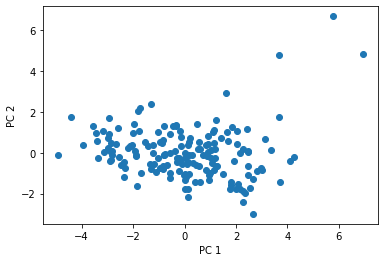

In [11]:
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

# 3.) Rank the features in order of importance according to PCA

In [12]:
loadings = pca.components_

# Get the absolute coefficients of the first two principal components
abs_coeffs = np.abs(loadings[:2, :])

# Compute the feature importance scores by summing the absolute coefficients across the two principal components
feat_scores = np.sum(abs_coeffs, axis=0)

# Rank the features by importance based on their score
feat_ranking = np.argsort(-feat_scores)

# Print the feature ranking
print("Feature ranking:")
for i, feat in enumerate(feat_ranking):
    print(f"{i+1}. Feature {feat+1} ({feat_scores[feat]:.3f})")

Feature ranking:
1. Feature 2 (0.897)
2. Feature 4 (0.833)
3. Feature 7 (0.649)
4. Feature 1 (0.612)
5. Feature 8 (0.559)
6. Feature 9 (0.439)
7. Feature 5 (0.421)
8. Feature 3 (0.394)
9. Feature 6 (0.202)


# 4.) Plot a heatmap of the feature importance (Fill in all parameters)

In [13]:
feature_names = df.columns[1:]

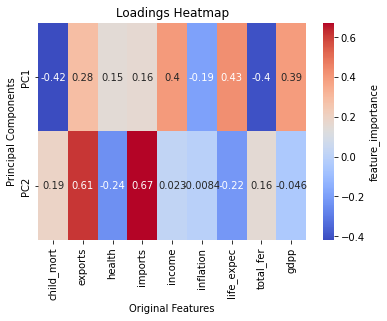

In [20]:

sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=list(X.columns), yticklabels=['PC1', 'PC2'], cbar_kws={'label':'feature_importance'})

plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.title('Loadings Heatmap')
plt.show()

# 5.) Plot a correlation plot of the original features. What do you notice between the graphs of 4 & 5?

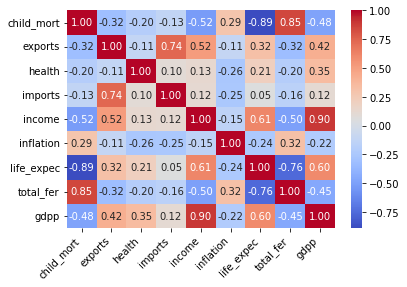

In [21]:
import seaborn as sns
import pandas as pd

corr = X.corr()

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

I noticed that exports and imports has the highest correlation, in the same time, they are the highest two important features. 

# 6.) Run a PCA with 9 PCs. Plot a Cumulative Explained Variance Plot. How many PCs should we use if we want to retain 95% of the variance?

In [22]:
pca = PCA(n_components=9)
X_pca = pca.fit(X_scaled)

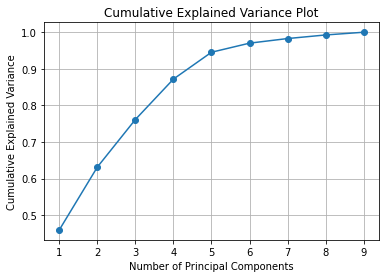

In [23]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

it looks like we would need to use around 5 principal components to retain 95% of the variance.